In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/drive/My Drive/Google Colab/Dicoding/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = os.path.join('/tmp/rockpaperscissors')
train_dir = os.path.join(base_dir, 'rps-cv-images') 


In [5]:
# hanya memakai folder default dari file
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [8]:

data_generator = ImageDataGenerator(
    validation_split=0.2, # pemisahan training dan validation dataset dengan porsi validation dataset sebesar 20 persen
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=90,
    fill_mode = 'nearest',
    brightness_range=[0.6,1.1],
)

train_datagen = data_generator.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),
        class_mode='categorical',
        color_mode='rgb',
        subset="training"  # merujuk sebagai training data
        )

test_datagen = data_generator.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),
        class_mode='categorical',
        color_mode='rgb',
        subset="validation")  # merujuk sebagai validation data



Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [20]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)       

In [21]:
history = model.fit(train_datagen, 
                    steps_per_epoch=128, 
                    epochs=10, 
                    validation_data=test_datagen, 
                    validation_steps=128)

Epoch 1/10
128/128 [==============================] - 131s 1s/step - loss: 1.0403 - accuracy: 0.4017 - val_loss: 0.9223 - val_accuracy: 0.6115
Epoch 2/10
128/128 [==============================] - 135s 1s/step - loss: 0.6585 - accuracy: 0.7175 - val_loss: 0.6391 - val_accuracy: 0.7348
Epoch 3/10
128/128 [==============================] - 129s 1s/step - loss: 0.5145 - accuracy: 0.7904 - val_loss: 0.5151 - val_accuracy: 0.8009
Epoch 4/10
128/128 [==============================] - 128s 1s/step - loss: 0.3403 - accuracy: 0.8762 - val_loss: 0.2437 - val_accuracy: 0.9119
Epoch 5/10
128/128 [==============================] - 129s 1s/step - loss: 0.2002 - accuracy: 0.9345 - val_loss: 0.1669 - val_accuracy: 0.9472
Epoch 6/10
128/128 [==============================] - 131s 1s/step - loss: 0.1800 - accuracy: 0.9425 - val_loss: 0.1880 - val_accuracy: 0.9365
Epoch 7/10
128/128 [==============================] - 131s 1s/step - loss: 0.1630 - accuracy: 0.9465 - val_loss: 0.1299 - val_accuracy: 0.9547

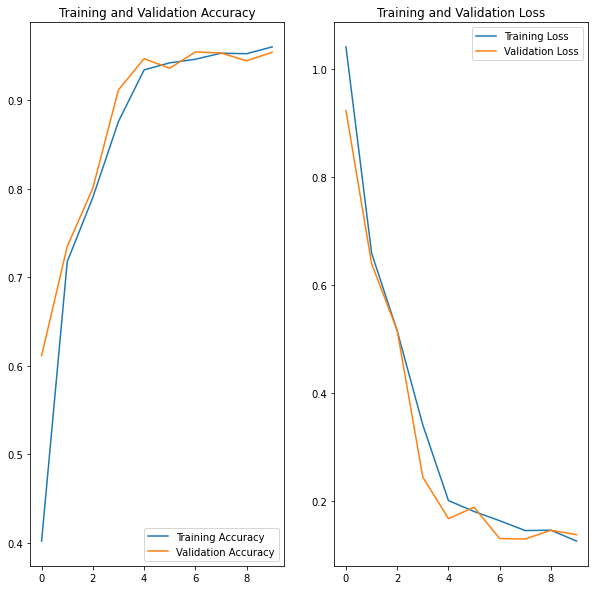

In [22]:

import matplotlib.pyplot as plt

%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving ngrJl9cJoUVFdYwO.png to ngrJl9cJoUVFdYwO.png
<PIL.Image.Image image mode=RGB size=150x150 at 0x7FDF694BC828>
[[0. 0. 1.]]
ngrJl9cJoUVFdYwO.png
IT'S SCISSOR!


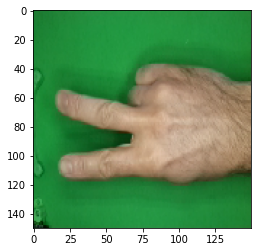

In [23]:
from keras.preprocessing import image
import matplotlib.image as mpimg
from google.colab import files
import numpy as np

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150,3))
  print(img)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images)
  print(classes)

  print(fn)

  if (classes[0,0] > classes[0,1]) and (classes[0,0] > classes[0,2]):
    print("IT'S PAPER!")
  elif (classes[0,1] > classes[0,0]) and (classes[0,1] > classes[0,2]):
    print("IT'S ROCK!")
  elif (classes[0,2] > classes[0,0]) and (classes[0,2] > classes[0,1]):
    print("IT'S SCISSOR!")